<a href="https://colab.research.google.com/github/nickmaglowsch/pythonMontecarlo/blob/master/motecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [55]:
ticker = 'MGLU3.SA'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2006-1-1')['Adj Close']

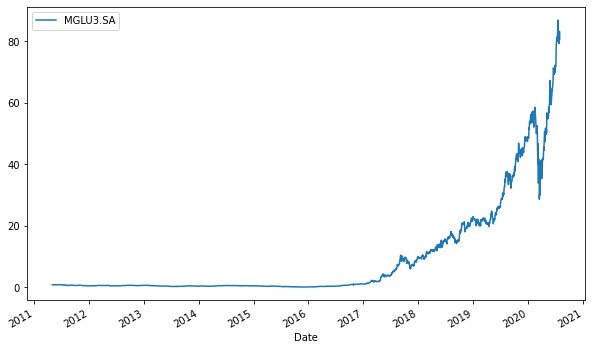

In [56]:
log_returns = np.log(1 + data.pct_change())
log_returns.tail()
data.plot(figsize=(10,6));

In [57]:
u = log_returns.mean()
u

MGLU3.SA    0.001985
dtype: float64

In [58]:
var = log_returns.var()
var

MGLU3.SA    0.001486
dtype: float64

In [59]:
drift = u - (0.5 * var)
drift

MGLU3.SA    0.001242
dtype: float64

In [60]:
stdev = log_returns.std()
stdev

MGLU3.SA    0.038549
dtype: float64

In [61]:
norm.ppf(0.95)

1.6448536269514722

In [62]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.52539077, -0.96382702],
       [-0.97210227,  0.12553764],
       [ 0.82691373, -0.53470881],
       [-0.28027255,  0.0430633 ],
       [-0.16655669, -0.5535189 ],
       [-1.93477404, -0.35564595],
       [ 0.37219965,  1.84140736],
       [-0.20981474, -0.75500393],
       [-0.00735225, -1.22741701],
       [ 0.7200767 ,  0.68435563]])

In [63]:
t_intervals = 400
iterations = 10

In [64]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [65]:
daily_returns

array([[1.06494245, 1.02402014, 1.04079752, ..., 1.03275791, 1.04614899,
        0.96024206],
       [1.01609588, 0.9634239 , 0.90980001, ..., 0.94311124, 0.97301393,
        0.97556849],
       [0.94563367, 0.97222214, 0.96463039, ..., 1.00790222, 1.03893324,
        1.02383462],
       ...,
       [0.94649849, 0.96648714, 1.05655477, ..., 1.08468792, 1.00474441,
        1.02466072],
       [1.02723516, 0.9715803 , 1.02101001, ..., 0.96307346, 1.06731065,
        0.97112061],
       [1.07067573, 1.02392688, 0.9727054 , ..., 1.0220343 , 0.97307422,
        1.00734264]])

In [66]:
S0 = data.iloc[-1]
S0

MGLU3.SA    80.709999
Name: 2020-07-31 00:00:00, dtype: float64

In [67]:
price_list = np.zeros_like(daily_returns)

In [68]:
price_list[0] = S0

In [69]:
for t in range(1, t_intervals):
  price_list[t] = price_list[t-1] * daily_returns[t]

In [70]:
price_list

array([[ 80.70999908,  80.70999908,  80.70999908, ...,  80.70999908,
         80.70999908,  80.70999908],
       [ 82.0090976 ,  77.75794245,  73.42995763, ...,  76.11850715,
         78.5319532 ,  78.73813214],
       [ 77.55056388,  75.59799357,  70.8327683 , ...,  76.72001213,
         81.58945685,  80.61482588],
       ...,
       [115.23375733,  40.88483555,  87.14897471, ...,  79.96899471,
         34.97710264, 415.88519433],
       [118.37216744,  39.72290071,  88.97997556, ...,  77.0160168 ,
         37.33143427, 403.87468398],
       [126.73820661,  40.67334592,  86.55130253, ...,  78.7130108 ,
         36.32625645, 406.84018957]])

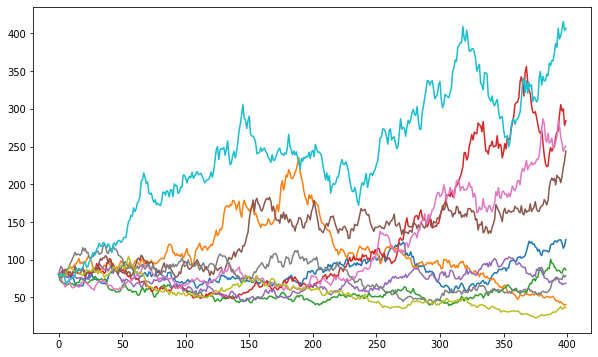

In [71]:
plt.figure(figsize=(10,6))
plt.plot(price_list)